<a href="https://colab.research.google.com/github/Terry-Migwi/Core_Week_9_IP_Notebook---Classification_Models/blob/master/Moringa_Data_Science_Core_W9_IP_2020_08_Terry_Migwi_KNN_Classification_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Defining the question

###Specifying the data analytic question


* This study is required to make use of the titanic dataset provided to:
 build a model that predicts which passengers were most likely to survive the Titanic shipwreck


###Defining the metrics for success

This study will be considered a success if:

*   We get an accuracy score of at least 80% for our model
*   We are able to obtain better metrics to assess our model 
*   We are able to plot auc curves and explain the results


###Understanding the context

The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. 

The  interesting  observation which comes out  from the  sinking is that some  people were more likely to survive than others i.e women and children were the ones who got the priority to rescue. The objective of this study is to first explore previously  unknown  information  by applying exploratory  data analytics  on available  dataset and then apply KNN model to complete the analysis of what sorts of people were likely to survive


###Recording the experimental design

The following steps will be followed for the study:

1.   Importing libraries and loading data from a csv file
1.   Checking the data
1.   Conducting necessary data cleaning procedures
1.   Performing Exploratory Data Analysis
1.   Performing data pre-processing
1.   Building KNN classification model for this study
1.   Assessing/ Evaluating the model
1.   Making a conclusion on the study

###Data Relevance

We have details of the passengers of the Titanic which include personal details such as Name, Age, gender, number of siblings and spouses, number of children and parents e.t.c and also the passengers details on the ship such as class they boarded, cabin they were occupying, where they embarked, ticket number e.t.c. Features like fare, age, sex, class will be used to make the  predictions while features such as name and ticket will be dropped as they are irrelevant for this study.
Some columns such as age and cabin have a lot of missing data hence we will be required to approximate what we can and drop what can't be approximated. The available data is therefore relevant for predicting survivability of a passenger.

##Reading the data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# loading datasets
train_df = pd.read_csv("/content/KNN - train data (5).csv")
test_df = pd.read_csv("/content/KNN - test data (1).csv")

# setting index for both dataframes as passengerid
train_df.set_index("PassengerId", inplace = True) 
test_df.set_index("PassengerId", inplace = True) 


##Checking the data

In [3]:
# previewing the top both datasets
print(train_df.head())
print(test_df.head())

             Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S

[5 rows x 11 columns]
             Pclass  ... Embarked
PassengerId          ...         
892               3  ...        Q
893               3  ...        S
894               2  ...        Q
895               3  ...        S
896               3  ...        S

[5 rows x 10 columns]


In [4]:
# previewing the tails of both datasets
print(train_df.tail())
print(test_df.tail())

             Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
887                 0       2  ...   NaN        S
888                 1       1  ...   B42        S
889                 0       3  ...   NaN        S
890                 1       1  ...  C148        C
891                 0       3  ...   NaN        Q

[5 rows x 11 columns]
             Pclass                          Name  ... Cabin  Embarked
PassengerId                                        ...                
1305              3            Spector, Mr. Woolf  ...   NaN         S
1306              1  Oliva y Ocana, Dona. Fermina  ...  C105         C
1307              3  Saether, Mr. Simon Sivertsen  ...   NaN         S
1308              3           Ware, Mr. Frederick  ...   NaN         S
1309              3      Peter, Master. Michael J  ...   NaN         C

[5 rows x 10 columns]


In [5]:
# determing the shape of the datasets
train_df.shape
test_df.shape

display('The train data has {} observations with {} features'.format(train_df.shape[0], train_df.shape[1]))
display('The test data has {} observations with {} features'.format(test_df.shape[0], test_df.shape[1]))


'The train data has 891 observations with 11 features'

'The test data has 418 observations with 10 features'

In [6]:
# printing the columns
print("The columns for the train dataset are : ", train_df.columns)
print("\n")
print("The columns for the test dataset are : ", test_df.columns)

The columns for the train dataset are :  Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


The columns for the test dataset are :  Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


**The following is a description of the features:**


*   Survived - Survival (0 = No; 1 = Yes), indicating if a passenger survived or not
*   Pclass - Passenger Class, a proxy for social economic class ( (1 = 1st(Upper); 2 = 2nd(Middle); 3 = 3rd(Lower), )
*   Name - Name of the passenger
*   Sex - Sex of the passenger
*   Age - Age of the passenger, Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
*   Sibsp - The dataset defines family relations in this way...

    Sibling = brother, sister, stepbrother, stepsister

    Spouse = husband, wife (mistresses and fiancés were ignored)
*   Parch - The dataset defines family relations in this way...

    Parent = mother, father

    Child = daughter, son, stepdaughter, stepson
    
    Some children travelled only with a nanny, therefore parch=0 for them.
*   Fare - Passenger Fare
*   Cabin - Cabin
*   Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [7]:
# checking for the datatypes of each feature
print(train_df.dtypes)
print("\n")
print(test_df.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [8]:
# checking for unique values
print(train_df.nunique())
print("\n")
print(test_df.nunique())

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64


Pclass        3
Name        418
Sex           2
Age          79
SibSp         7
Parch         8
Ticket      363
Fare        169
Cabin        76
Embarked      3
dtype: int64


In [9]:
# obtaining more information about the datasets
print(train_df.info())
print("\n")
print(test_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       

##External dataset validation

This dataset was validated from the original source of the data which is titanic.doc and titanic.dat. The datasets are the same hence we can deduce that this data is valid 

## Data Preparation

###Ensuring validity 

**Assessing how the columns influence survival of the passengers:**

*   Survived - This is our target variable hence we will keep it
*   Pclass - Could the class of a passenger determine if they survived or not? probably
*   Name - Could a person's age determine if they survived or not? Probably not
*   Sex - Could the gender of a passenger determine if they survived or not? probably
*   Age - Could the age of a passenger determine if they survived or not?
*   SibSp - Could the number of relatives on the boat (that are siblings or a spouse) determine if a passenger survived or not? Probability
*   Parch - Could the number of relatives on the boat (that are children or parents) determine if the passenger survived or not? Probability
*   Ticket - Could the ticket number determine if a passenger survived or not? Probably not
*   Fare - Could the fare paid determine of the passenger survived or Not? Probably
*  Cabin - Could the cabin the passengers occupied determine if a person survived or not? Probably. 
* Embarked - Could the point of embarkation determine if the passenger survived or not? It depends on how the boat was filled
  

In [10]:
# the columns  "cabin, name and ticket " seem irrelevant for our study hence we will drop them

train_df = train_df.drop(['Name','Ticket'], axis = 1)

# previewing the data
train_df.head(2)

Survived  Pclass     Sex   Age  ...  Parch     Fare  Cabin Embarked
PassengerId                                  ...                                
1                   0       3    male  22.0  ...      0   7.2500    NaN        S
2                   1       1  female  38.0  ...      0  71.2833    C85        C

[2 rows x 9 columns]

In [11]:
# the columns  "cabin, name and ticket " seem irrelevant for our study hence we will drop them

test_df = test_df.drop(['Name','Ticket'], axis = 1)

# previewing the data
test_df.head(2)

Pclass     Sex   Age  SibSp  Parch    Fare Cabin Embarked
PassengerId                                                           
892               3    male  34.5      0      0  7.8292   NaN        Q
893               3  female  47.0      1      0  7.0000   NaN        S

### Assigning appropriate datatypes

In [12]:
columns = ["Sex", "Embarked"]
# coverting columns to string datatypes
for column in columns:
  train_df[columns] = train_df[columns].astype('str')
  test_df[columns] = test_df[columns].astype('str')

# import label encoder 
from sklearn.preprocessing import LabelEncoder

# instatiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
# train_df["Embarked"] = train_df["Embarked"].apply(le.fit_transform)

train_df[columns] = train_df[columns].apply(lambda col: le.fit_transform(col))
test_df[columns] = test_df[columns].apply(lambda col: le.fit_transform(col))

In [13]:
# confirming changes have been made
print(train_df.dtypes)
print("\n")
print(test_df.dtypes)

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked      int64
dtype: object


Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked      int64
dtype: object


###Completeness

In [14]:
# columns with missing values
print(train_df.isnull().any())
print("\n")
print(test_df.isnull().any())


Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Cabin        True
Embarked    False
dtype: bool


Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Cabin        True
Embarked    False
dtype: bool


In the train dataset, we have missing values in the columns Age, Cabin and Embarked while in the test dataset, we have missing values in the Age, Fare and Cabin columns

In [15]:
# columns with missing values

print(train_df.isnull().sum())
print("\n")
print(test_df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64


Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64


Age column and cabin seem to have the highest number of missing values in both dataframes

#### Dealing with missing data

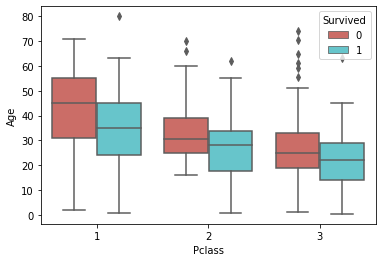

In [16]:
# investigating the age column
# boxplots to determine how the age varies with pclass and if the passenger survived or not
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train_df, palette = 'hls')

# sns.catplot(x="status", y="age", hue="sex", kind='box', data=hypothyroid);

We observe that from each class people who survived are younger than the people who did not survive. 

1.   For passengers who were in pclass 1, the mean age of those who did not survive is 45 years old while the mean of those who survived is 35 years
1.   For passengers who were in pclass 2 the mean age of those who survived is 30 years while the mean age of those who did not survive is around 28 years old
2.   For passengers who were in pclass 3, the mean age of those who did not survive is 25 years while the mean of those who survived is 23 years 


In [17]:
# we will write a function that approximates a passengers age, based on their survival and class 


def age_approx(cols):
  Age = cols[0]
  Pclass = cols[1]
  Survived = cols[2]

  if pd.isnull(Age):
    if Pclass == 1:
      if Survived == 0:
         return 45
      elif Survived == 1:
         return 35
    if Pclass == 2:
      if Survived == 0:
         return 30
      elif Survived == 1:
         return 28
    if Pclass == 3:
      if Survived == 0:
         return 25
      elif Survived == 1:
         return 23
  else:
      return Age
      
# applying the function
train_df['Age'] = train_df[['Age', 'Pclass', 'Survived']].apply(age_approx, axis = 1)

# checking if there are null values left in the age column
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

We now have null values in the cabin column only on the train dataset

In [18]:
# confirming the function did not tamper with the records that did Not have missing values
train_df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Cabin  Embarked
PassengerId                                                                    
1                   0       3    1  22.0      1      0   7.2500   NaN         2
2                   1       1    0  38.0      1      0  71.2833   C85         0
3                   1       3    0  26.0      0      0   7.9250   NaN         2
4                   1       1    0  35.0      1      0  53.1000  C123         2
5                   0       3    1  35.0      0      0   8.0500   NaN         2

The values in the age column are as before hence the function performed as was intended.

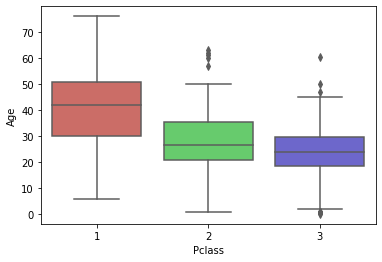

In [19]:
# missing values in the age column in the test dataset
sns.boxplot(x='Pclass', y='Age', data=test_df, palette = 'hls')


We could say that there is a loose relationship between pclass and age variables. Higher classes have older passengers as compared to lower classes. i.e The older a passenger is, the more likely it is for them to be in 1st class and the younger a passenger is, the more likely it is that they are in 3rd class 


In [20]:
# we will write a function that approximates a passengers age, based on their class. 
# From the box plot, we observe that the average age of 1st class passengers 
# is about 42, 2nd class passengers is 26, and 3rd class pasengers is 22.

def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 26
        else:
            return 22
    else:
        return Age

# applying the function to the test data set
test_df['Age'] = test_df[['Age', 'Pclass']].apply(age_approx, axis = 1)

# checking if there are null values left in the age column
test_df.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

We have managed to approximate age values in both datasets. Now we have missing values in the cabin dataset on both columns and one missing value in the fare column in the test dataset we need to deal with.

We will drop the cabin column on both datasets and impute the missing value in the fare column with the mode value of the fare column. 

In [21]:
# dropping the cabin column
train_df = train_df.drop("Cabin", axis = 1)
test_df = test_df.drop("Cabin", axis = 1)

In [22]:
# filling the missing value with the mode
test_df["Fare"] = test_df["Fare"].fillna((test_df["Fare"].median()))


In [23]:
# confirming we do not have any missing values in the data

print(train_df.isnull().any())
print("\n")
print(test_df.isnull().any())

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool


Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool


We now have complete data

###Consistency

In [119]:
# duplicated values
print(train_df[train_df.duplicated()].shape)
print("\n")
print(test_df[test_df.duplicated()].shape)

(117, 8)


(42, 7)


There seem to be null values in both datasets. Let's investigate the individual records to affirm this

In [162]:
print(train_df[train_df.duplicated()])


             Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                              
48                  1       3    0  23.0      0      0   7.7500         1
77                  0       3    1  25.0      0      0   7.8958         2
78                  0       3    1  25.0      0      0   8.0500         2
88                  0       3    1  25.0      0      0   8.0500         2
96                  0       3    1  25.0      0      0   8.0500         2
...               ...     ...  ...   ...    ...    ...      ...       ...
871                 0       3    1  26.0      0      0   7.8958         2
878                 0       3    1  19.0      0      0   7.8958         2
879                 0       3    1  25.0      0      0   7.8958         2
885                 0       3    1  25.0      0      0   7.0500         2
887                 0       2    1  27.0      0      0  13.0000         2

[117 rows x 8 columns]


In [163]:
print(test_df[test_df.duplicated()])

             Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                    
971               3    0  24.0      0      0   7.7500         1
975               3    1  22.0      0      0   7.8958         2
985               3    1  22.0      0      0   8.0500         2
994               3    1  22.0      0      0   7.7500         1
999               3    1  22.0      0      0   7.7500         1
1016              3    1  22.0      0      0   7.7500         1
1036              1    1  42.0      0      0  26.5500         2
1039              3    1  22.0      0      0   8.0500         2
1040              1    1  42.0      0      0  26.5500         2
1050              1    1  42.0      0      0  26.5500         2
1072              2    1  30.0      0      0  13.0000         2
1075              3    1  22.0      0      0   7.7500         1
1111              3    1  22.0      0      0   8.0500         2
1119              3    0  22.0      0   

The records are not entirely duplicated records rather similar categories of class, sex and embarked hence we will maintain these records

###Outliers

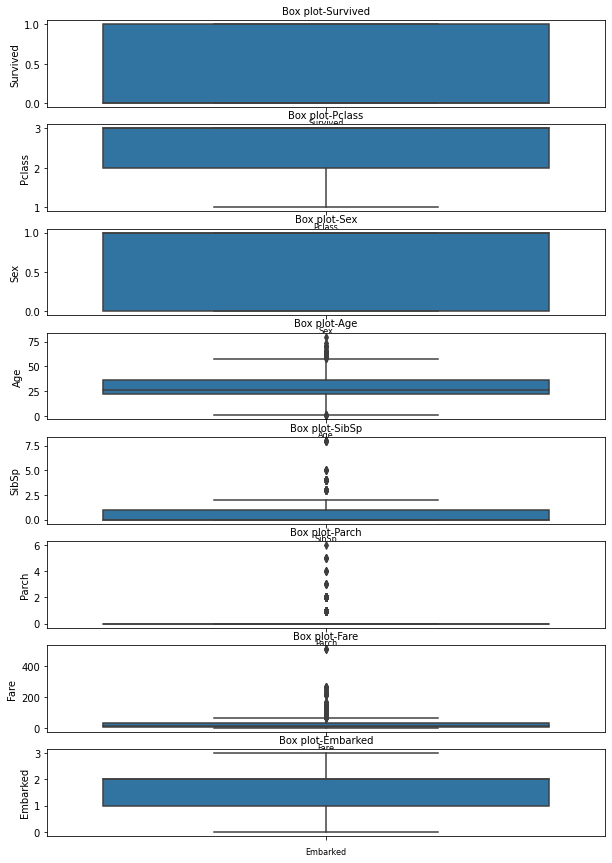

In [165]:
# checking for outliers in the train dataset
numerical_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

fig, ax = plt.subplots(len(numerical_columns), figsize = (10, 15))

for i, col_val in enumerate(numerical_columns):

  sns.boxplot(y= train_df[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()



**Observations:**

1.   Age column has passengers from 70 - 80 and 0 ages which are outliers
1.   Fare column has observations concentrated between 50 - 150 and from 200 - 300. There is one observation above 500

**Conclusion:**
We will keep the outliers as they are all valid observations but scale the data during modelling to obtain best results


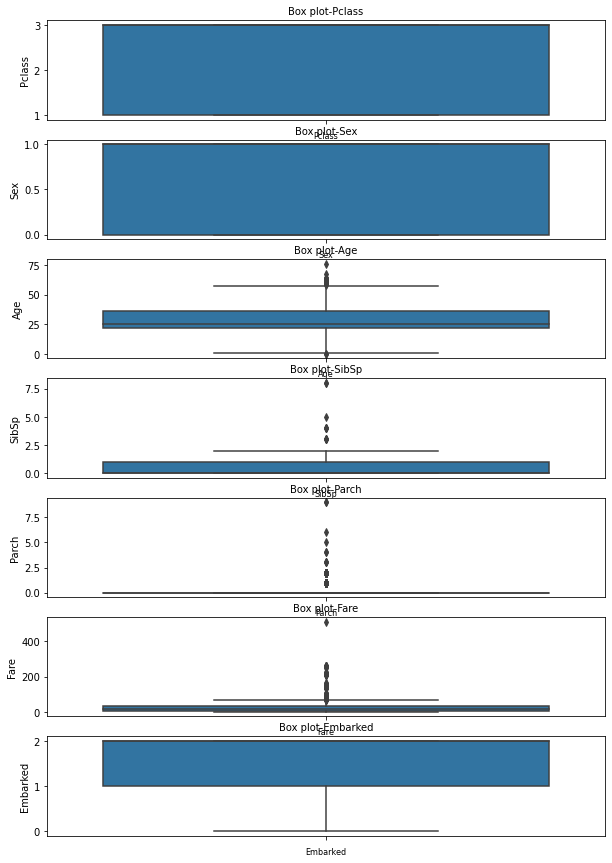

In [166]:
# checking for outliers in the test dataset
numerical_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

fig, ax = plt.subplots(len(numerical_columns), figsize = (10, 15))

for i, col_val in enumerate(numerical_columns):

  sns.boxplot(y= test_df[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

**Observations:**
1.   The Age column has 2 observations above 60 years
1.   Fare column has one outlier at 500

**Conclusion:**
We will retain the outliers as they are all valid observations but scale the data during modelling to obtain best results


##Exploratory Data Analysis

In [120]:
!pip install -U pandas-profiling

     |████████████████████████████████| 266kB 3.5MB/s 
     |████████████████████████████████| 604kB 8.3MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 3.1MB 15.4MB/s 
     |████████████████████████████████| 296kB 37.0MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=1b01f55e04ac3880dfb5570cf5972e869e4912dfeaf7aca27d2f6446445f93b0
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=b7383ace7c27a483175607f4d0b4e38883a0c4c5dfdeee8da88f30528b812692
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

In [24]:
import pandas_profiling as pp
import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport
ProfileReport(train_df, title = "train data report")

**Findings from the report:**
*   We have a total of 5 numerical variables, 2 categorical and 2 boolean variables
*   Columns Sibsp, Parch and Fare have zeros
*   The survived column shows that most of the passengers did Not survive
*   The Pclass column shows that there were more people in class 3 than in other classes
*   Sex column shows that most passengers were male
*   The age of the passengers ranged from 0.42 - 80 with a mean of 29.5
*   Sibsp has a maximum of 8 and a minimum of 0
*   Parch column has a maximum of 6 and a minimum of 0
*   Most people embarked from Southampton
*   Fare column has real numbers ranging from 0 - 512.329, with a mean value of 32.20 




In [25]:
import pandas_profiling as pp
import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport
ProfileReport(test_df, title = "train data report")

**Findings from the report:**
*   Sibsp and Parch columns have a lot of zeros
*   We have 5 numerical columns, 2 categorical and 1 boolean
*   The Pclass column shows that there were more people in class 3 than in other classes
*   Sex column shows that most passengers were male 
*   Age column contains real values with a minimum of 0.17 and a maximum of 76 
*   Sibsp has a maximum of 9 and a minimum of 0
*   Most people embarked from Southampton
*   Fare column has real numbers ranging from 0 - 512.329, with a mean value of 35.57

*   Parch column has a maximum of 6 and a minimum of 0


##Bivariate Analysis

What is the relationship of all the categorical columns

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


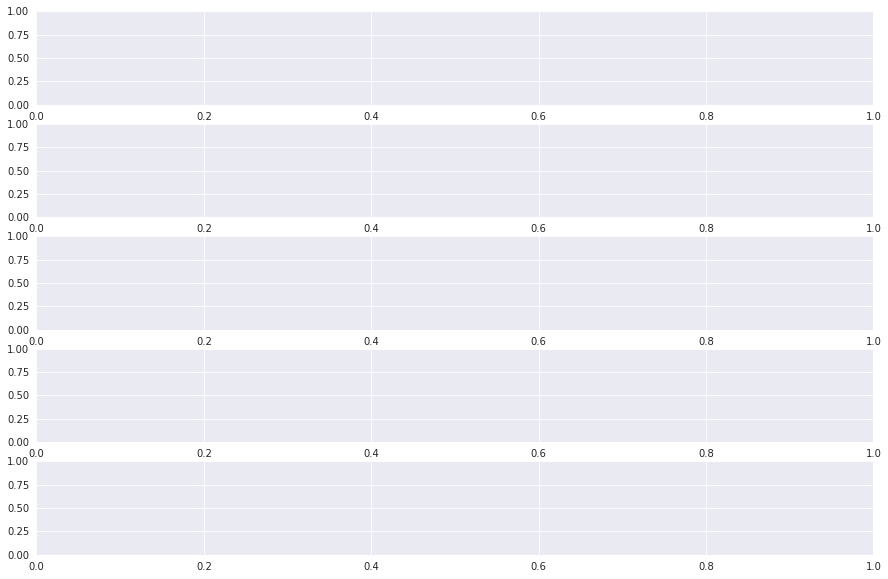

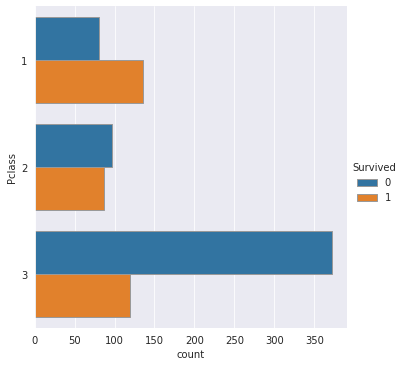

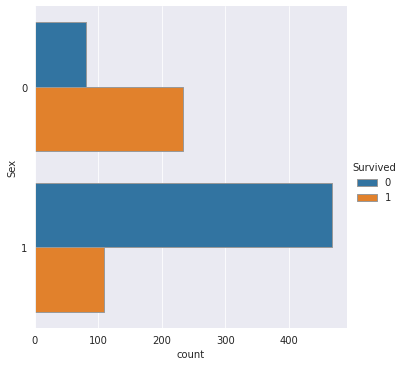

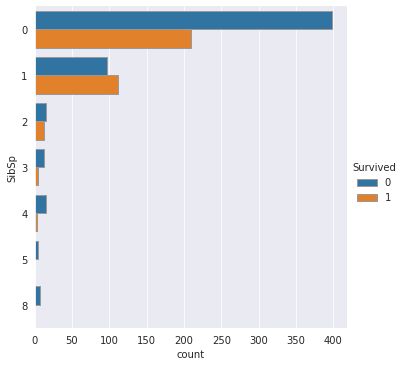

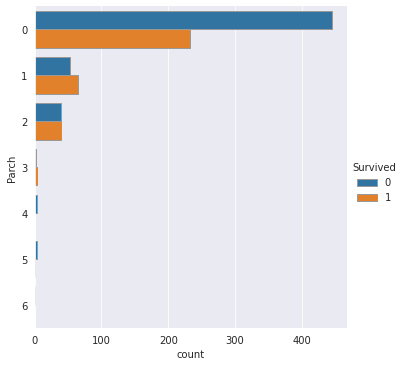

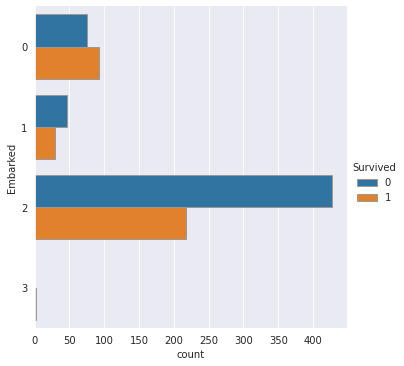

In [191]:
# plotting cat plots
categorical = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
sns.set_style('darkgrid')

fig, axes = plt.subplots(len(categorical), figsize=(15, 10))

# we will set the hue to be the status column as this is our target variable
for var, subplot in zip(categorical, axes.flatten()):
  sns.catplot(y=var, kind="count", hue="Survived", edgecolor=".6", data=train_df, ax=subplot);

**Observations from the plots**

*   P-class - More people in first class survived as compared to those who did not survive. In second class, the difference in the number of people who survived and those who did not survive is not that much but we have more people who did not survive. In third class, we have the majority of the people who did not survive as compared to those who actually survived

*   Sex - We have more females who actually survived as compared to the males

*   Parch - A huge number of the passengers on board did not have children and/or paents. Of those who did not have any children and/or parents, the number that did not survive is more than those who did survive. Of those who had either one child or one parent on board, most are the ones who actually survived. Of those with either two children and/or a parent, we have an equal number of people who actually survived and who did not survive. Of those who had more than 3 children and/or parents, the number is negligible and it's not as easy to tell

*   Sibsp -  Most people did Not have any siblings or spoused on board. Of those who did not have any siblings or spouses, the number that did not survive is more than those who did survive. Of those who had either one sibling or one spouse on board, most are the one's who actually survived. Of those with either more than two siblings and/or a spouse, those who did not survive are more than those who actually survived.


*   Embarked - We have three embarkation points i.e 0 = Cherbourg; 1 = Queenstown; 2 = Southampton. Most of the people embarked from Southampton. Of those who embarked from Southampton, most are those who did Not survive. Similarly, Of those who embarked from Queenstown most did Not survive. However, those who embarked from Cherbourg actually did survive.


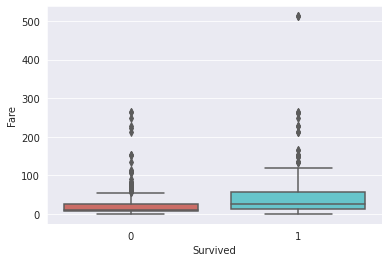

In [193]:
# whisker plots showing how age relates with survival
sns.boxplot(x='Survived', y='Fare', data=train_df, palette = 'hls')


The fare rates of most people who survived seems to be slightly higher than those actaully did survive

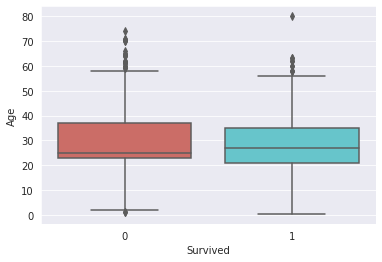

In [194]:
# whisker plots showing how age relates with survival
sns.boxplot(x='Survived', y='Age', data=train_df, palette = 'hls')


The mean age of passengers who actually survived seems to be slightly higher than the mean age of the passengers who did not survive. However, the box plots seem to be on an equal scale hence probably this observation was brought about by the fact that there is an outlier obsercation of a passenger who was 80 years who actually did survive.

In [207]:
# checking the class Imbalance
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

From the above, we observe that there is a class imbalance on our dependent variable. We have more people who did Not survive as compared to the people who actually survived.

## Baseline Model

We will use  binomial logistic regression as our baseline model to find the probability of a passenger surviving and the probability of not surviving. 

In [29]:
# necessary imports for modellling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [30]:
# splitting data into dependent and independent variables
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']                        #whether an individual survived or not is our dependent variable


# splitting data into train and test sets with training sets of 80% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# fitting our model
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# using our model to make a prediction
y_pred = LogReg.predict(X_test)

In [31]:
# evaluating the model
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)
print(classification_report(y_test, y_pred))
print('Accuracy', accuracy_score(y_test, y_pred))


[[96 14]
 [18 51]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Accuracy 0.8212290502793296


Our model has an accuracy of 0.82 which is approximately 82%. The correct number of predictions is (96 true positives and 51 false negatives) while the number of incorrect predictions is (14 false positives and 18 false negatives)

In [206]:
# Data Reduction
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']    

# splitting the data into train and test sets
# import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# normalizing our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# applying Linear Discriminant Analyis
# import
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# printing factors that affect the price of a house in order of how much weight each of the factors carry 
factors = pd.DataFrame (index = X.columns.values, data = lda.coef_[0].T)
# pd.options.display.float_format = '{:.8f}'.float_format
factors.sort_values(0, ascending = False)


0
Fare      0.090883
Parch    -0.072930
Embarked -0.121310
SibSp    -0.402235
Age      -0.703275
Pclass   -1.043481
Sex      -1.674073

We note that each of the features was a contributor to whether a passenger survives or Not. The importance of the features is as follows: Sex, Pclass, Age, Sibsp, Embarked, Parch and Fare in order of importance.



##K-Nearest Neighbors Classification

We will use KNN neighbors to predict passengers who survived and those who did Not survive. KNN stores all available cases and classifies new cases by a majority vote of it's k neighbors. Predictions are made for a new datapoint by searching through the entire training set for the k most similar instances and summarizing the output variable for the k instances.

In [46]:
# creating dependent and independent variables
D = train_df.iloc[:, 1:8]
e = train_df.iloc[:, 0]

# splitting the data into 80% train set and 20% test set
from sklearn.model_selection import train_test_split
D_train, D_test, e_train, e_test = train_test_split(D, e, test_size=0.20, random_state = 6)

# using standard scaler to standardize our features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(D_train)

# standardizing the independent features
D_train = scaler.transform(D_train)
D_test = scaler.transform(D_test)


####Obtaining the best value of k we should use

In [33]:
# square root value of the length of the test data 
import math
math.sqrt(len(e_test))

13.379088160259652

Text(0, 0.5, 'Cross-validated accuracy')

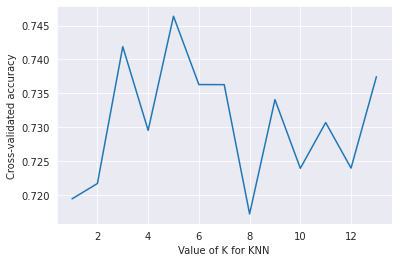

In [214]:
# using cross validation to obtain the best accuracy of k

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Number of k from 1 to 14
k_range = range(1, 14)
k_scores = []

# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
 knn = KNeighborsClassifier(n_neighbors=k)

# It’s 10 fold cross validation with ‘accuracy’ scoring 
 scores = cross_val_score(knn, D, e, cv=10, scoring='accuracy') 
 k_scores.append(scores.mean())
%matplotlib inline

# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

The curve shows varying accuracies obtained with different values of k. We will go with k=5 since it has the highest accuracy obtained

In [63]:
# building the model with k=5
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric = 'euclidean')

# fitting the model to our train data
classifier.fit(D_train, e_train)

# making predictions on our test set
e_pred = classifier.predict(D_test)

# evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(e_test, e_pred))
print(classification_report(e_test, e_pred))
print('Accuracy', accuracy_score(e_test, e_pred))


[[99 14]
 [22 44]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       113
           1       0.76      0.67      0.71        66

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

Accuracy 0.7988826815642458


KNN: f1=0.730 auc=0.838


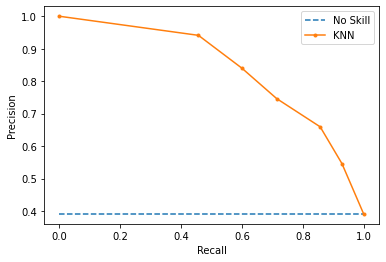

In [35]:
# precision - recall curve to evaluate the correct prediction of those who survived (as it is the minority class)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# predict probabilities
lr_probs = classifier.predict_proba(D_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
# yhat = classifier.predict(D_test)

lr_precision, lr_recall, _ = precision_recall_curve(e_test, lr_probs)
lr_f1, lr_auc = f1_score(e_test, e_pred), auc(lr_recall, lr_precision)
# summarize scores
print('KNN: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(e_test[e_test==1]) / len(e_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='KNN')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

The model gives us an accuracy of 79%. The correct number of predictions is (92 true positives and 50 true negatives) while incorrect number of predictions is (17 true negatives and 20 false negatives). The f1 score is 0,73. The Area Under the Curve is 0.823 which means that the correct predictions of the minority class(1, those who survived) is quite ok. However, this model has performed worse than our baseline model hence we will employ some techniques to improve the performance of the model.

####Applying Reduction Techniques

As we had seen, the feature importance is as follows: 

Fare	0.090883
Parch	-0.072930
Embarked	-0.121310
SibSp	-0.402235
Age	-0.703275
Pclass	-1.043481
Sex	-1.674073

Hence we will apply Linear Discriminant Analysis to reduce dimensionality.

In [60]:
M= train_df.iloc[:, 1:8]
n = train_df.iloc[:, 0]

# importing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA().fit(M, n)
M = lda.transform(M)

# splitting the data into 80% train set and 20% test set
from sklearn.model_selection import train_test_split
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.20, random_state = 6)

# importing standard scaler and fitting it to  M_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(M_train)

# standardizing the independent features
M_train = scaler.transform(M_train)
M_test = scaler.transform(M_test)


In [61]:
# building the model
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric = 'euclidean')
classifier.fit(M_train, n_train)

# making predictions
n_pred = classifier.predict(M_test)

# evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(n_test, n_pred))
print(classification_report(n_test, n_pred))
print('Accuracy', accuracy_score(n_test, n_pred))


[[107   6]
 [ 25  41]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       113
           1       0.87      0.62      0.73        66

    accuracy                           0.83       179
   macro avg       0.84      0.78      0.80       179
weighted avg       0.83      0.83      0.82       179

Accuracy 0.8268156424581006


KNN: f1=0.726 auc=0.845


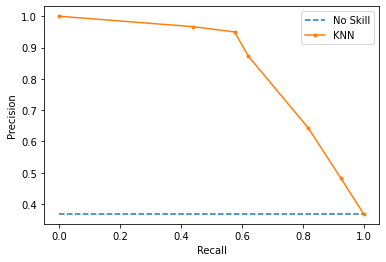

In [62]:
# plotting the precison - recall curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# predict probabilities
lr_probs = classifier.predict_proba(M_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
# yhat = classifier.predict(D_test)

lr_precision, lr_recall, _ = precision_recall_curve(n_test, lr_probs)
lr_f1, lr_auc = f1_score(n_test, n_pred), auc(lr_recall, lr_precision)
# summarize scores
print('KNN: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(n_test[n_test==1]) / len(n_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='KNN')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

The accuracy of the model has increased significantly to approximately 83% . The precision has also increased but the recall has decreased. The f1 score has decresed slightly an indication that in general, this model is not a better model but since the AUC score has slighlty increased, the model has done a better job in making correct predictions on the minority class (those who survived)

In [66]:
# creating dependent and independent sets
G = train_df.iloc[:, 1:8]
h = train_df.iloc[:, 0]

# importing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA().fit(G, h)
M = lda.transform(G)

# splitting the data into 70% train and 30% test set
from sklearn.model_selection import train_test_split
G_train, G_test, h_train, h_test = train_test_split(G, h, test_size=0.30)

# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(G_train)

G_train = scaler.transform(G_train)
G_test = scaler.transform(G_test)

# building the model on our train sets
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric = 'euclidean')
classifier.fit(G_train, h_train)

# making predictions
h_pred = classifier.predict(G_test)

# evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(h_test, h_pred))
print(classification_report(h_test, h_pred))
print('Accuracy', accuracy_score(h_test, h_pred))



[[147  23]
 [ 28  70]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       170
           1       0.75      0.71      0.73        98

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268

Accuracy 0.8097014925373134


The accuracy has reduced to approximately 81%. 

In [68]:
I = train_df.iloc[:, 1:8]
j = train_df.iloc[:, 0]


# importing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA().fit(I, j)
M = lda.transform(I)

# splitting the data into 60% train and 40% test
from sklearn.model_selection import train_test_split
I_train, I_test, j_train, j_test = train_test_split(I, j, test_size=0.40)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(G_train)

I_train = scaler.transform(I_train)
I_test = scaler.transform(I_test)

classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric = 'euclidean')
classifier.fit(I_train, j_train)

j_pred = classifier.predict(I_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(j_test, j_pred))
print(classification_report(j_test, j_pred))
print('Accuracy', accuracy_score(j_test, j_pred))


[[181  35]
 [ 55  86]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       216
           1       0.71      0.61      0.66       141

    accuracy                           0.75       357
   macro avg       0.74      0.72      0.73       357
weighted avg       0.74      0.75      0.74       357

Accuracy 0.7478991596638656


KNN: f1=0.656 auc=0.729


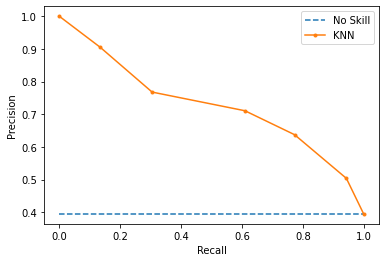

In [69]:
# predict probabilities
lr_probs = classifier.predict_proba(I_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
# yhat = classifier.predict(D_test)

lr_precision, lr_recall, _ = precision_recall_curve(j_test, lr_probs)
lr_f1, lr_auc = f1_score(j_test, j_pred), auc(lr_recall, lr_precision)
# summarize scores
print('KNN: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(j_test[j_test==1]) / len(j_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='KNN')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

The accuracy, f1 score and the AUC score have all reduced significantly. From this we can conclude that as we tend to neutralize the train and test sets, the performance of the models reduces.

####Test set

In [86]:
# fitting the test_df to the model that perfomed best i.e gave the highest f1 score

M= train_df.iloc[473:, 1:8]
n = train_df.iloc[473:, 0]

Test_data = test_df.iloc[:, 0:7]

# importing standard scaler and fitting it to  M
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(M)

# standardizing the independent features
M_train = scaler.transform(M)
Test_data = scaler.transform(Test_data)

# building the model
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric = 'euclidean')
classifier.fit(M, n)

# making predictions on the test data
test_pred = classifier.predict(Test_data)
test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

##Challenging the solution

The best model we have obtained resulted to an accuracy of 82.6% and f1 score of 0.726. This was after performing dimension reduction, scaling the features and changing the distance metric. This seems to be a good model and we can consider this study successful as we have surpussed our metric for success.

However, our prediction on the test set suggests that all those passengers were likley to survive, this should be looked into. Also, we did Not cross validate our data. Let's find out if cross validation will improve our model. 

####Cross-validation with KNN

In [88]:
W= train_df.iloc[:, 1:8]
v = train_df.iloc[:, 0]

# importing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA().fit(W, v)
W = lda.transform(W)

# splitting the data into 80% train set and 20% test set
from sklearn.model_selection import train_test_split
W_train, W_test, v_train, v_test = train_test_split(W, v, test_size=0.20, random_state = 6)

# importing standard scaler and fitting it to  M_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(W_train)

# standardizing the independent features
W_train = scaler.transform(W_train)
W_test = scaler.transform(W_test)

In [90]:
# building the model on our train sets
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric = 'euclidean')
classifier.fit(W_train, v_train)

# making predictions
v_pred = classifier.predict(W_test)

# Train the model and predict for k=1
# knn = KNeighborsClassifier(n_neighbors=19)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# classification report for test set
print(metrics.classification_report(v_test, v_pred, digits=3, zero_division = 1))

# Calculate cv score with 'accuracy' scoring and 10 folds
accuracy = cross_val_score(classifier, W, v, scoring = 'accuracy',cv=10)
print('cross validation score',accuracy.mean())

# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(classifier, W, v, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc',accuracy.mean())


              precision    recall  f1-score   support

           0      0.811     0.947     0.873       113
           1      0.872     0.621     0.726        66

    accuracy                          0.827       179
   macro avg      0.841     0.784     0.800       179
weighted avg      0.833     0.827     0.819       179

cross validation score 0.7980024968789013
cross validation score with roc_auc 0.8322115836233485


After cross validation, the accuracy has actually reduced as compared to prior models hence it is probably not a good idea to cross validate the data. Hence for better results, probably using a different model would result to a better fit. 

##Follow up questions

The feature importance obtained from linear discriminant analysis showed that all the features we had were actually important in predicting survival, is there a possibility we also dropped features that were equally important when deciding on what to keep? If we used a different technique to determine importance of features, would we have obtained the same features with equal importance? 